# EGSIS = Exploratory Graph-based Semi Supervised Image Segmentation

Unindo todas as partes: 

- criação de superpixels
- criação de rede complexa
- aplicação da dinâmica coletiva (LCU)
- classificando as regiões não conhecidas
- obtendo segmentos da imagem

Essa variação contém um anotador que desenvolvi para não ser necessário pré-segmentar a imagem com superpixels pra realizar a anotação. Por esse motivo, as gerações prévias dos superpixels e redes complexas serão omitidas.

In [1]:
import os
os.environ["LOGURU_LEVEL"] = "DEBUG"

In [1]:
# ref: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut, cat, microaneurysms, rocket, horse, retina, coins
from skimage.util import img_as_ubyte

from egsis import model
from egsis import image
from egsis.annotators import PointAnnotator

# Label annotation

In [16]:
img = img_as_ubyte(retina())

annotator = PointAnnotator(img, classes=["fg", "retina"], resize_f=0.4)
annotator.display()

# Model EGSIS execution

2023-10-19 16:03:57.762 | INFO     | egsis.model:fit_predict:142 - Run!
2023-10-19 16:04:17.256 | INFO     | egsis.lcu:__init__:90 - hyperparams: n_classes=2, competition_level=1, max_iter=30
2023-10-19 16:04:17.257 | DEBUG    | egsis.lcu:n0:222 - n0: classes=2, shape=(2, 100)
2023-10-19 16:04:17.260 | INFO     | egsis.lcu:n0:229 - n0: [[0.54744526 0.91240876 0.72992701 0.         0.         0.
  0.3649635  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.91240876 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.91240876 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

(-0.5, 1410.5, 1410.5, -0.5)

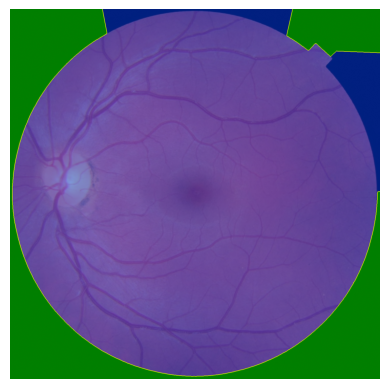

In [26]:
X = img
y = annotator.label_matrix

m = model.EGSIS(
    superpixel_segments=100,
    superpixel_sigma=0.5,
    superpixel_compactness=40,
    feature_extraction="comatrix",
    lcu_max_iter=30,
    feature_similarity="cosine",
)

# Fit predict receiving a image mask
mask = m.fit_predict_segmentation_mask(X, y)
plt.imshow(image.segmentation_mask_blend(img, mask, annotator.labels_by_color))
plt.axis('off')